# Data on population in zip codes

In [1]:
import pandas as pd

In [2]:
pd.read_excel('population_copenhagen.xlsx')

,"Befolkningen efter alder, k¯n, tid og distrikt",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,,,,Bydel - Indre By,Bydel - ÿsterbro,Bydel - N¯rrebro,Bydel - Vesterbro/Kongens Enghave,Bydel - Valby,Bydel - Vanl¯se,Bydel - Br¯nsh¯j-Husum,Bydel - Bispebjerg,Bydel - Amager ÿst,Bydel - Amager Vest,Bydel - Frederiksberg,Bydel - Frederiksberg C
2,Alder i alt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,,K¯n i alt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,,,2022K3,56338,80356,78402,77704,65176,40598,43803,54017,61663,85505,69576,36123
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Kilde: K¯benhavns Kommunes beregninger pÂ bagg...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
pd.read_excel('higher_education_copenhagen.xlsx')

,"Befolkningens h¯jest fuldf¯rte uddannelse (15-69 Âr) efter alder, k¯n,",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,"h¯jeste fuldf¯rte uddannelse, tid og distrikt",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,,,,,Bydel - Indre By,Bydel - ÿsterbro,Bydel - N¯rrebro,Bydel - Vesterbro/Kongens Enghave,Bydel - Valby,Bydel - Vanl¯se,Bydel - Br¯nsh¯j-Husum,Bydel - Bispebjerg,Bydel - Amager ÿst,Bydel - Amager Vest,Bydel - Frederiksberg,Bydel - Frederiksberg C
3,Alder i alt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,,K¯n i alt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,,,Lange videregÂende uddannelser,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,,,,2021,12332,17016,16001,16640,9765,6497,5354,8078,10160,13884,13625,7018
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Kilde: K¯benhavn Kommunes beregninger pÂ baggr...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Danmarks Statistiks Forskningsservice,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### (NET) Consumer prices

**The consol that we use is: [console](https://api.statbank.dk/console)**

In [10]:
import requests # import the module requests

In [84]:
# Construct API request
def construct_link(table_id, variables):
    base = f'https://api.statbank.dk/v1/data/{table_id}/JSONSTAT?HOVED=1005'
    
    for var in variables:
        base += f'&{var}'

    return base 

url = construct_link('PRIS115', ['Tid=*'])

In [85]:
def create_data(url):
    response = requests.get(url).json()
    values = response['dataset']['value']
    years = response['dataset']['dimension']['Tid']['category']['index']
    years = list(map(int, years))
    data = dict(zip(years, values))
    return data

data = create_data(url)

In [86]:
print(type(data))

<class 'dict'>


In [100]:
net_inflation = pd.DataFrame({'years': list(data.keys()), 'net_index': list(data.values())})
net_inflation

,years,net_index
0,1980,35.8
1,1981,39.8
2,1982,43.9
3,1983,46.6
4,1984,49.4
5,1985,51.7
6,1986,52.1
7,1987,53.7
8,1988,56.4
9,1989,59.4


Change baseindex from 2015 to 2021:

In [109]:
net_inflation['net_index (2021 = 100)'] =  round(net_inflation['net_index']/net_inflation['net_index'].iloc[-1]*100,1) 
net_inflation

,years,net_index,net_index (2021 = 100)
0,1980,35.8,34.0
1,1981,39.8,37.8
2,1982,43.9,41.7
3,1983,46.6,44.2
4,1984,49.4,46.9
5,1985,51.7,49.1
6,1986,52.1,49.4
7,1987,53.7,50.9
8,1988,56.4,53.5
9,1989,59.4,56.4


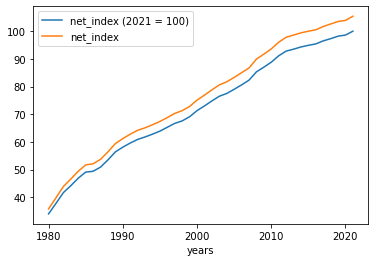

In [125]:
net_inflation.plot(x ='years', y=['net_index (2021 = 100)','net_index']);

###  <span style="color:red">Calculate change in nominal and real prices (need data on real estate!) text</span>

In [114]:
net_inflation_dict = dict(zip(net_inflation.index.astype(int), net_inflation['net_index']))
net_inflation_dict[2021] = 100
net_inflation_dict

{0: 35.8,
 1: 39.8,
 2: 43.9,
 3: 46.6,
 4: 49.4,
 5: 51.7,
 6: 52.1,
 7: 53.7,
 8: 56.4,
 9: 59.4,
 10: 61.2,
 11: 62.8,
 12: 64.2,
 13: 65.1,
 14: 66.2,
 15: 67.4,
 16: 68.8,
 17: 70.3,
 18: 71.3,
 19: 72.8,
 20: 75.1,
 21: 76.9,
 22: 78.8,
 23: 80.6,
 24: 81.7,
 25: 83.3,
 26: 85.0,
 27: 86.7,
 28: 89.9,
 29: 91.7,
 30: 93.6,
 31: 96.0,
 32: 97.8,
 33: 98.6,
 34: 99.4,
 35: 100.0,
 36: 100.5,
 37: 101.7,
 38: 102.6,
 39: 103.5,
 40: 103.9,
 41: 105.4,
 2021: 100}

Need to change the code below!

In [ ]:
net_inflation['net_index'] = [net_inflation_dict[year] for year in pd.to_datetime(df_hp.soldDate).dt.year]
df_hp['inflation (2019 = 100)'] = [inflation_dict[year] for year in pd.to_datetime(df_hp.soldDate).dt.year]

In [ ]:
df_hp['Real_price'] = (df_hp.price/df_hp['inflation (2019 = 100)'])*100

In [ ]:
plt.subplots(figsize=(10, 6))
df_hp.groupby([pd.to_datetime(df_hp.soldDate).dt.year])['price']\
     .mean()\
    .plot(label = "Nominal price")

df_hp.groupby([pd.to_datetime(df_hp.soldDate).dt.year])['Real price']\
     .mean()\
     .plot(label="Real price")

plt.legend()
plt.ylabel("Price")